# CAD Laboratory (CE4P001) - Assignment No. 2


**Name:** Shivam Kumar  
**Roll No.:** 22CE01046  
**Date:** November 02, 2025  
  


1. Given the two-dimensional body

$$
    \mathcal{B}=\{(X_{1},X_{2})|0.1<X_{1}<1, 0.1<X_{2}<1\},
$$

and the displacement field 

$$
    u_{1}=u\cdot e_{1}=0.2 \ln(1+X_{1}+X_{2}), 
$$

$$ 
    u_{2}=u\cdot e_{2}=0.2 \exp X_{1},
$$

Plot the displaced shape of the body using Julia.

**Hint:** First set up some characteristic lines on the body. For each point compute its displacement and add it to the original position by noting $x_{i}=e_{i}\cdot(X+u)$.

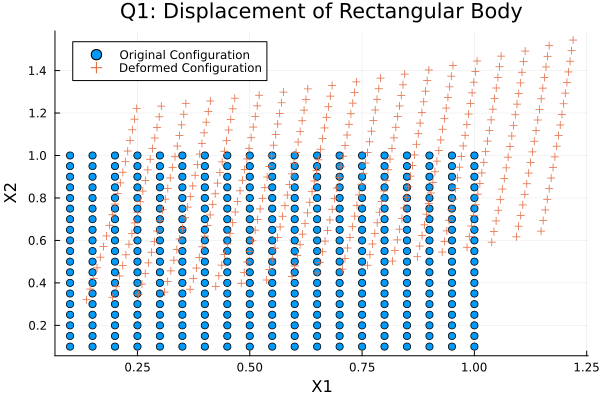

In [1]:
using Plots

# 1. Define the original domain (undeformed grid)
x1_range = 0.1:0.05:1.0
x2_range = 0.1:0.05:1.0

# Lists to store coordinates
X1_orig, X2_orig = Float64[], Float64[]
x1_new, x2_new = Float64[], Float64[]

# 2. Compute displacement and new positions
for x1 in x1_range
    for x2 in x2_range
        # Original Coordinates
        push!(X1_orig, x1)
        push!(X2_orig, x2)
        
        # Displacement field u1, u2 [cite: 16]
        u1 = 0.2 * log(1 + x1 + x2)
        u2 = 0.2 * exp(x1)
        
        # Deformed Coordinates xi = Xi + ui
        push!(x1_new, x1 + u1)
        push!(x2_new, x2 + u2)
    end
end

# 3. Plotting
scatter(X1_orig, X2_orig, label="Original Configuration", marker=:circle, legend=:topleft)
scatter!(x1_new, x2_new, label="Deformed Configuration", marker=:cross)
title!("Q1: Displacement of Rectangular Body")
xlabel!("X1")
ylabel!("X2")

2. With respect to a two-dimensional rectangular cartesian coordinates system with orthonormal base vectors $(e_{1},e_{2})$, let the rectangular coordinates of a point be denoted by $(X_{1},X_{2})$. Consider a two-dimensional annular body $\mathcal{B}$ which occupies the region:
$$\mathcal{B}=\{(X_{1},X_{2})|1<\sqrt{X_{1}^{2}+X_{2}^{2}}<2\}$$.

Because of the annual nature of the body consider a polar coordinates system in which the coordinates of points are expressed in terms $(R, \theta)$, which are related to the rectangular coordinates $(X_{1},X_{2})$ by:
$$R=\sqrt{X_{1}^{2}+X_{2}^{2}} and \theta=\tan^{-1}(X_{2}/X_{1})$$

Further, the orthonormal base vectors $(e_{r},e_{\theta})$ of the polar coordinate system are related to $(e_{1},e_{2})$ by:
$$e_{r}=\cos \theta e_{1}+\sin \theta e_{2}, e_{\theta}=-\sin \theta e_{1}+\cos \theta e_{2}$$

Draw the deformed configuration of the annular body associated with the following deformation using Julia:
$$u_{r}=u\cdot e_{r}=0.4(R-1)^{2}\cos 3\theta$$
$$u_{\theta}=u\cdot e_{\theta}=0.4(R-1)^{3}$$

**Hint:**
First set up some characteristic lines on the body in terms of their $(R, \theta)$ coordinates. Compute the $(X_{1},X_{2})$ coordinates from $$X_{1}=R \cos \theta, X_{2}=R \sin \theta$$.
For each point compute its displacement and add it to the original position by noting $x_{i}=e_{i}\cdot(X+u)=e_{i}\cdot(X+u_{r}e_{r}+u_{\theta}e_{\theta})$.



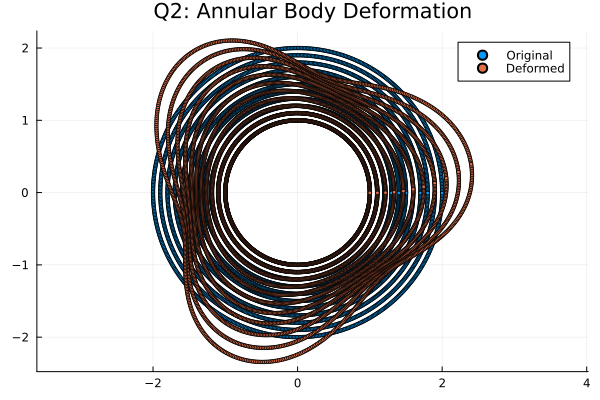

In [1]:
using Plots

# 1. Define the annular domain using Polar Coordinates
R_range = 1.0:0.1:2.0
Theta_range = 0:0.01:2*pi

X1_orig, X2_orig = Float64[], Float64[]
x1_new, x2_new = Float64[], Float64[]

for r in R_range
    for theta in Theta_range
        # Convert Polar to Cartesian for Original Points [cite: 33]
        X1 = r * cos(theta)
        X2 = r * sin(theta)
        
        push!(X1_orig, X1)
        push!(X2_orig, X2)

        # Calculate Displacements in Polar Basis [cite: 29]
        u_r = 0.4 * (r - 1)^2 * cos(3 * theta)
        u_theta = 0.4 * (r - 1)^3

        # Transformation to Cartesian Basis
        # u1 = u_r * cos(theta) - u_theta * sin(theta)
        # u2 = u_r * sin(theta) + u_theta * cos(theta)
        # Derived from basis vector relations [cite: 25, 34]
        
        u1 = u_r * cos(theta) - u_theta * sin(theta)
        u2 = u_r * sin(theta) + u_theta * cos(theta)

        # Add displacement to original Cartesian coords
        push!(x1_new, X1 + u1)
        push!(x2_new, X2 + u2)
    end
end

# 3. Plotting
scatter(X1_orig, X2_orig, label="Original", aspect_ratio=:equal, markersize=2)
scatter!(x1_new, x2_new, label="Deformed", markersize=2)
title!("Q2: Annular Body Deformation")


3. Given the two-dimensional body
$$\mathcal{B}=\{(X_{1},X_{2})|0.1<X_{1}<1, 0.1<X_{2}<1\}$$,

and the displacement field
$$u_{r}=u\cdot e_{r}=0.2 \exp X_{1},  
u_{\theta}=u\cdot e_{\theta}=0.2 \ln(1+X_{1}+X_{2})$$.

Plot the displaced shape of the body using Julia.

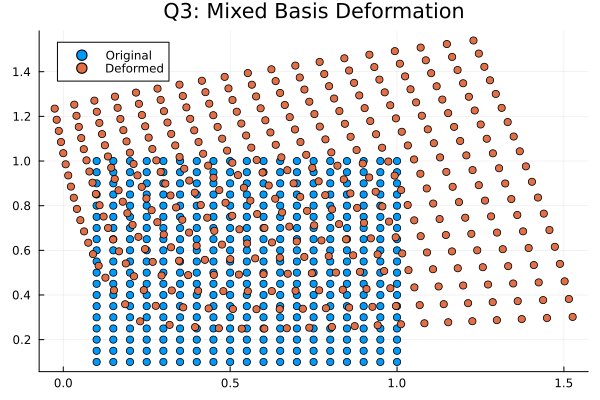

In [3]:
using Plots

x1_range = 0.1:0.05:1.0
x2_range = 0.1:0.05:1.0

X1_orig, X2_orig = Float64[], Float64[]
x1_new, x2_new = Float64[], Float64[]

for X1 in x1_range
    for X2 in x2_range
        push!(X1_orig, X1)
        push!(X2_orig, X2)

        # Calculate local polar parameters for basis transformation [cite: 23]
        R = sqrt(X1^2 + X2^2)
        theta = atan(X2, X1)

        # Calculate displacements (given values) [cite: 38, 40]
        u_r_val = 0.2 * exp(X1)
        u_theta_val = 0.2 * log(1 + X1 + X2)

        # Convert to Cartesian components u1, u2 using local theta
        # u = u_r * e_r + u_theta * e_theta
        u1 = u_r_val * cos(theta) - u_theta_val * sin(theta)
        u2 = u_r_val * sin(theta) + u_theta_val * cos(theta)

        push!(x1_new, X1 + u1)
        push!(x2_new, X2 + u2)
    end
end

scatter(X1_orig, X2_orig, label="Original", legend=:topleft)
scatter!(x1_new, x2_new, label="Deformed")
title!("Q3: Mixed Basis Deformation")

4. Find out the stress distribution by modeling the given rectangular plate of 2 mm thick with a circular hole. The dimensions of the steel plate and hole are shown in Figure 1. The section is made up of steel having a value of **210 GPa** for Young's modulus and a value of **0.3** for Poisson's ratio.

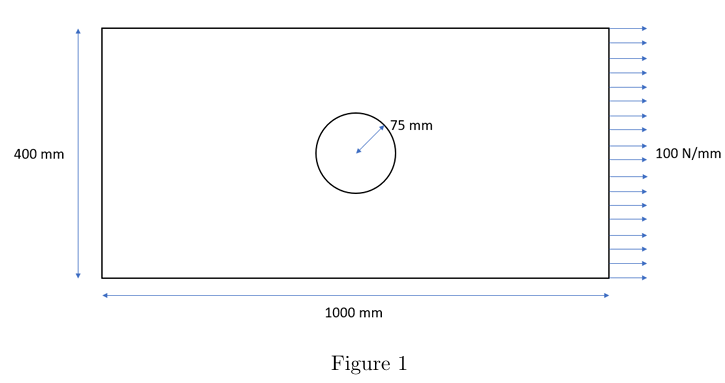

**(a)** Provide the steps for finite element meshing both in Julia and Abaqus.  
**(b)** Mention the governing PDEs that are required to solve for the stress distribution.  
**(c)** Provide a comparison between the results obtained from Gridap in Julia and Abaqus.

5. Find out the stress distribution of the cantilever beam of **1000 mm** in length and has a $250 \text{ mm} \times 200 \text{ mm}$ rectangular cross-section under the **point load of 1000 N** at the free end as shown in Figure 2. The section is made up of a concrete having a value of **25000 N/mm²** for Young's modulus and a value of **0.2** for Poisson's ratio in the respective fields.

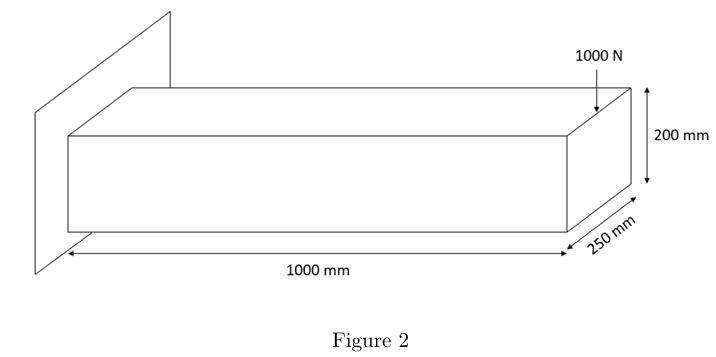

**(a)** Provide the steps for finite element meshing both in Julia and Abaqus.  
**(b)** Mention the governing PDEs that are required to solve for the stress distribution.  
**(c)** Provide a comparison between the results obtained from Gridap in Julia and Abaqus.

6. Find out the stress distribution of the cantilever beam of **1000 mm** in length and has a $250 \text{ mm} \times 200 \text{ mm}$ rectangular cross-section under the **uniform distributed load of 1000 N/mm²** applied on the top surface as shown in Figure 3. The section is made up of a concrete having a value of **25000 N/mm²** for Young's modulus and a value of **0.2** for Poisson's ratio in the respective fields.

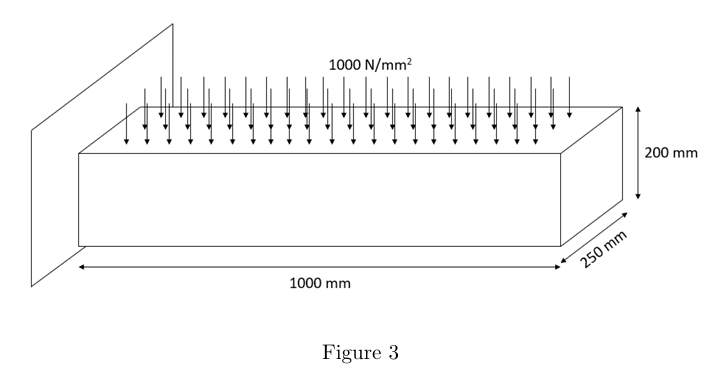

**(a)** Provide the steps for finite element meshing both in Julia and Abaqus.  
**(b)** Mention the governing PDEs that are required to solve for the stress distribution.  
**(c)** Provide a comparison between the results obtained from Gridap in Julia and Abaqus.